# Avacado Price Prediction

## Company Introduction
### **AvoCare** - A Major Avocado producer in US.

- Their avocados are sourced from over 1000 growers owning over 65,000 acres across California, Mexico, Chile, and Peru.
- With generations of experience growing, packing, and shipping avocados, they have a deep understanding of the avocado industry.
- Their aim is to source quality fruit that’s sustainably grown and handled in the most efficient, shortest supply route possible.
- They want to increase their supply throughout the United States and need to make sure that they are selling their products at the best possible price.

### Current Scenario
- Avocado prices have **rocketed** in recent years by up to **129%**, with the average national price in the **US** of a single Hass avocado reaching **$2.10** in 2019, almost doubling in just one year.
- Due to this uncertainty in the prices, the company is not able to sell their produce at the optimal price.

### Goal:
- You are given a dataset containing the weekly retail scan data of avocadoes.
- Your task is to build a regression model using the dataset.
- Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Importing Libraries

In [1]:
# # Package that is required by pandas profiling
# !pip install -q datascience
# # Library to generate basic statistics about data
# !pip install -q pandas-profiling

# !pip install -q --upgrade pandas-profiling

In [43]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization

import plotly.offline as py                                         # Importin Plotly library for interactive visualization
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
%matplotlib inline

#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import accuracy_score                          # For calculating the accuracy for the model
from sklearn.metrics import precision_score                         # For calculating the Precision of the model
from sklearn.metrics import recall_score                            # For calculating the recall of the model
from sklearn.metrics import precision_recall_curve                  # For precision and recall metric estimation
from sklearn.metrics import confusion_matrix                        # For verifying model performance using confusion matrix
from sklearn.metrics import f1_score                                # For Checking the F1-Score of our model  
from sklearn.metrics import roc_curve                               # For Roc-Auc metric estimation
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.ensemble import RandomForestClassifier                 # To create the RandomForest Model
from sklearn.model_selection import RandomizedSearchCV              # to create a RandomSearched hyper-tuned model
from sklearn.preprocessing import LabelEncoder                      # To encode categorical columns

#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

### Data Acquisition & Description

In [34]:
Avocado_Data = pd.read_csv("Avocado-Price-Prediction/avocado_train.csv")
Avocado_Data.head()

Id        Date  AveragePrice  Total Volume         4046        4225  \
0  14761  2017-08-20       1.86000    2584.08000     61.21000   143.82000   
1   6843  2017-11-12       1.14000  100811.00000   3181.00000 43510.00000   
2   7306  2017-02-12       0.95000  430096.94000 242212.80000 81697.52000   
3  12329  2016-05-22       1.71000    5433.16000    437.48000  2422.71000   
4  12036  2016-01-10       1.66000    5614.09000   2123.47000  2121.26000   

       4770   Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   0.00000   2379.05000  2379.05000     0.00000      0.00000       organic   
1  86.00000  54034.00000 11788.00000 42246.00000      0.00000  conventional   
2 264.25000 105922.37000 48557.37000 57365.00000      0.00000  conventional   
3 544.63000   2028.34000  2021.67000     6.67000      0.00000       organic   
4   0.00000   1369.36000   392.02000   977.34000      0.00000       organic   

   year      region  
0  2017      Albany  
1  2017  Louisville  
2  2017     Orlando  
3  2016   Charlotte  
4  2016     Atlanta

In [22]:
Avocado_Data.shape

(14599, 14)

- The dataset consists of the information about Avacado Sales. Various variables present in the dataset includes Id, Date, Average Price etc.
- The dataset comprises of 14599 observations of 14 columns. Below is a table showing names of all the columns and their description.

|Column Name|Description|
|:-|:-|
|Id|Unique identity of each observation|
|Date|The date of the observation|
|AveragePrice|The average price of a single avocado|
|Total Volume|Total number of avocados sold.|
|4046|Total number of avocados with PLU 4046 sold.|
|4225|Total number of avocados with PLU 4225 sold.|
|4770|Total number of avocados with PLU 4770 sold.|
|Total Bags|Total number of bags sold.|
|Small Bags|Total number of small bags sold.|
|Large Bags|Total number of large bags sold.|
|sugarpercent|Total number of extra-large bags sold.|
|type|Type of an avocado (conventional or organic).|
|year|The year of observation.|
|Region|The city or region of the observation.|

In [5]:
Avocado_Data.shape

(14599, 14)

### Data Information

In [6]:
Avocado_Data.info(verbose = True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14599 entries, 0 to 14598
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            14599 non-null  int64  
 1   Date          14599 non-null  object 
 2   AveragePrice  14599 non-null  float64
 3   Total Volume  14599 non-null  float64
 4   4046          14599 non-null  float64
 5   4225          14599 non-null  float64
 6   4770          14599 non-null  float64
 7   Total Bags    14599 non-null  float64
 8   Small Bags    14599 non-null  float64
 9   Large Bags    14599 non-null  float64
 10  XLarge Bags   14599 non-null  float64
 11  type          14599 non-null  object 
 12  year          14599 non-null  int64  
 13  region        14599 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 4.0 MB


There are no Null values as per ```info()```

### Data Statistics

In [7]:
Avocado_Data.describe()

Id  AveragePrice   Total Volume           4046           4225  \
count 14599.00000   14599.00000    14599.00000    14599.00000    14599.00000   
mean   9116.12090       1.40917   813661.38208   278761.62760   283515.65090   
std    5279.98990       0.40452  3292013.05240  1206792.16214  1150214.74644   
min       2.00000       0.44000      385.55000        0.00000        0.00000   
25%    4538.50000       1.10000    10808.23000      849.36000     3018.25500   
50%    9125.00000       1.37000   107018.62000     8425.39000    28907.47000   
75%   13698.50000       1.67000   426170.21000   108782.22000   145160.54500   
max   18249.00000       3.25000 62505646.52000 21620180.90000 20470572.61000   

               4770     Total Bags     Small Bags    Large Bags  XLarge Bags  \
count   14599.00000    14599.00000    14599.00000   14599.00000  14599.00000   
mean    21755.64303   229626.44096   174635.36528   51995.45303   2995.62224   
std    102560.78581   942977.45607   713921.22210  234344.10351  17313.44516   
min         0.00000        0.00000        0.00000       0.00000      0.00000   
25%         0.00000     5040.90000     2828.89000     131.45500      0.00000   
50%       180.72000    39602.96000    26311.76000    2621.75000      0.00000   
75%      6136.66500   109645.32500    83000.46500   21511.12000    127.94000   
max   2546439.11000 19373134.37000 13384586.80000 5719096.61000 551693.65000   

             year  
count 14599.00000  
mean   2016.14617  
std       0.93757  
min    2015.00000  
25%    2015.00000  
50%    2016.00000  
75%    2017.00000  
max    2018.00000

The average price of avocado is 1.40 and minimum and maximum is 0.44 and 3.25 respectively

### Data Profiling

In [8]:
profile = ProfileReport(df = Avocado_Data)
profile.to_file(output_file = 'Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [9]:
profile

#### Insights from profile Report
- Id is highliy cardinal and doesn't add any value
- region is categorical and highly cardinal
- type is categorical and has only two distinct values
- Small Bags, Large Bags and XLarge Bags has Zeroes which makes sense that they weren't sold on that day
- Total Bags has zeroes which means nothing has sold that day
- 4046, 4225, 4770 should be changed to Small HASS sold, Large HASS sold, XLarge HASS sold respectively as per PLU code for better understanding

### Pre-Processing the Data

Lets rename columns for better understanding

In [35]:

Avocado_Data.rename(columns={'4046':'Small HASS sold',
                          '4225':'Large HASS sold',
                          '4770':'XLarge HASS sold'}, 
                 inplace=True)


Value count between Conventional and Organic type

In [36]:

Avocado_Data.type.value_counts()

conventional    7301
organic         7298
Name: type, dtype: int64

Removing Id column as it is an index column and useless

In [37]:

Avocado_Data.drop("Id", axis=1,inplace=True) #dropping the column as it pnly contains index

Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

In [38]:

Avocado_Data['Date']=pd.to_datetime(Avocado_Data['Date'])
Avocado_Data['Month']=Avocado_Data['Date'].apply(lambda x:x.month)
Avocado_Data['Day']=Avocado_Data['Date'].apply(lambda x:x.day)

In [39]:
Avocado_Data.head()

Date  AveragePrice  Total Volume  Small HASS sold  Large HASS sold  \
0 2017-08-20       1.86000    2584.08000         61.21000        143.82000   
1 2017-11-12       1.14000  100811.00000       3181.00000      43510.00000   
2 2017-02-12       0.95000  430096.94000     242212.80000      81697.52000   
3 2016-05-22       1.71000    5433.16000        437.48000       2422.71000   
4 2016-01-10       1.66000    5614.09000       2123.47000       2121.26000   

   XLarge HASS sold   Total Bags  Small Bags  Large Bags  XLarge Bags  \
0           0.00000   2379.05000  2379.05000     0.00000      0.00000   
1          86.00000  54034.00000 11788.00000 42246.00000      0.00000   
2         264.25000 105922.37000 48557.37000 57365.00000      0.00000   
3         544.63000   2028.34000  2021.67000     6.67000      0.00000   
4           0.00000   1369.36000   392.02000   977.34000      0.00000   

           type  year      region  Month  Day  
0       organic  2017      Albany      8   20  
1  conventional  2017  Louisville     11   12  
2  conventional  2017     Orlando      2   12  
3       organic  2016   Charlotte      5   22  
4       organic  2016     Atlanta      1   10

### Data Visualization

Checking demand between Avocado Types (Conventional or Organic)? 

In [44]:
Type=Avocado_Data.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

Just over **2%** of our dataset is **organic**. So looks like **Conventional is in more demand**. Now, let's look at the average price distribution

<AxesSubplot:xlabel='AveragePrice'>

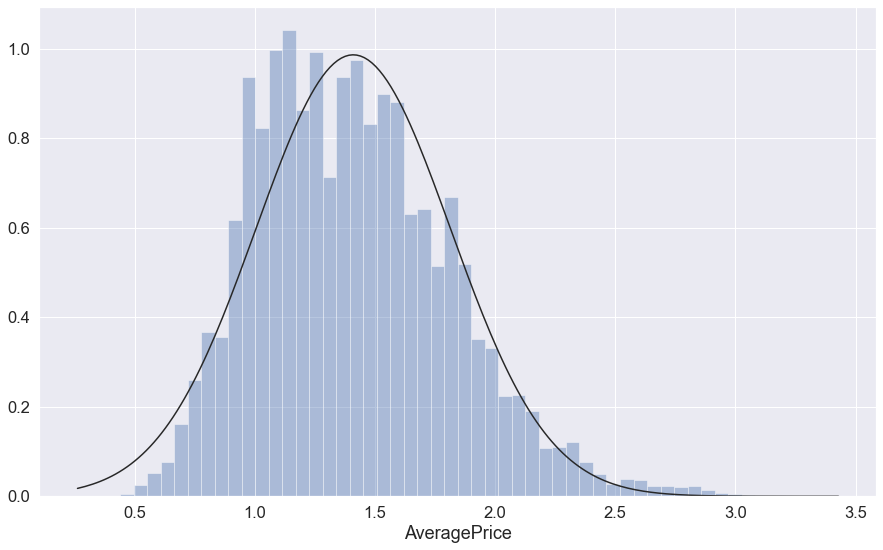

In [45]:

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=Avocado_Data.AveragePrice, kde=False, fit=norm)


Average Price distribution shows that for most cases **price of avocado is between 1.1, 1.4.**

Distribution of average price over months (for seasonal analysis)

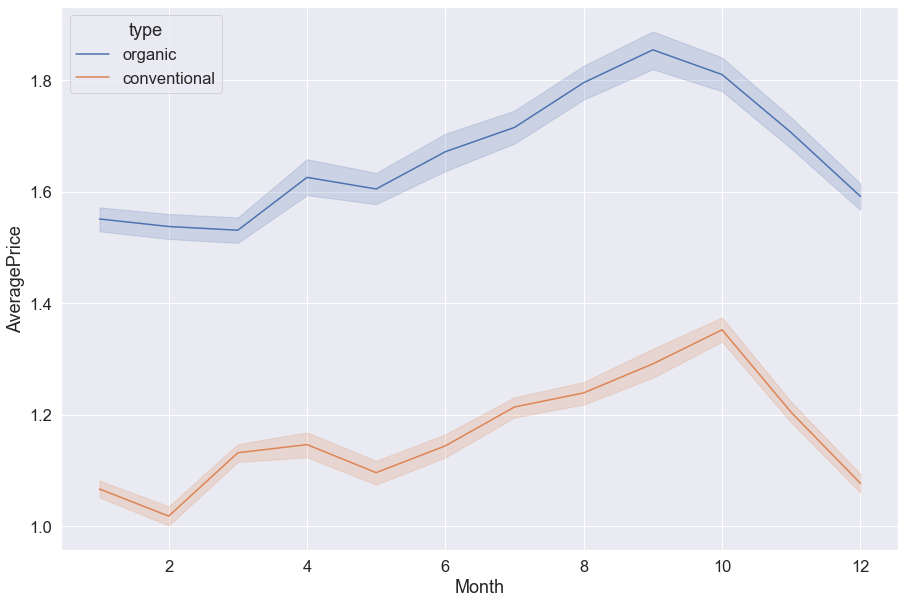

In [48]:
plt.figure(figsize=(15,10))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=Avocado_Data)
plt.show()

Looks like there was a **hike between months 8 – 10 for both Conventional and Organic** type of Avocados prices

Checking TOP 5 regions where Average price are very high

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

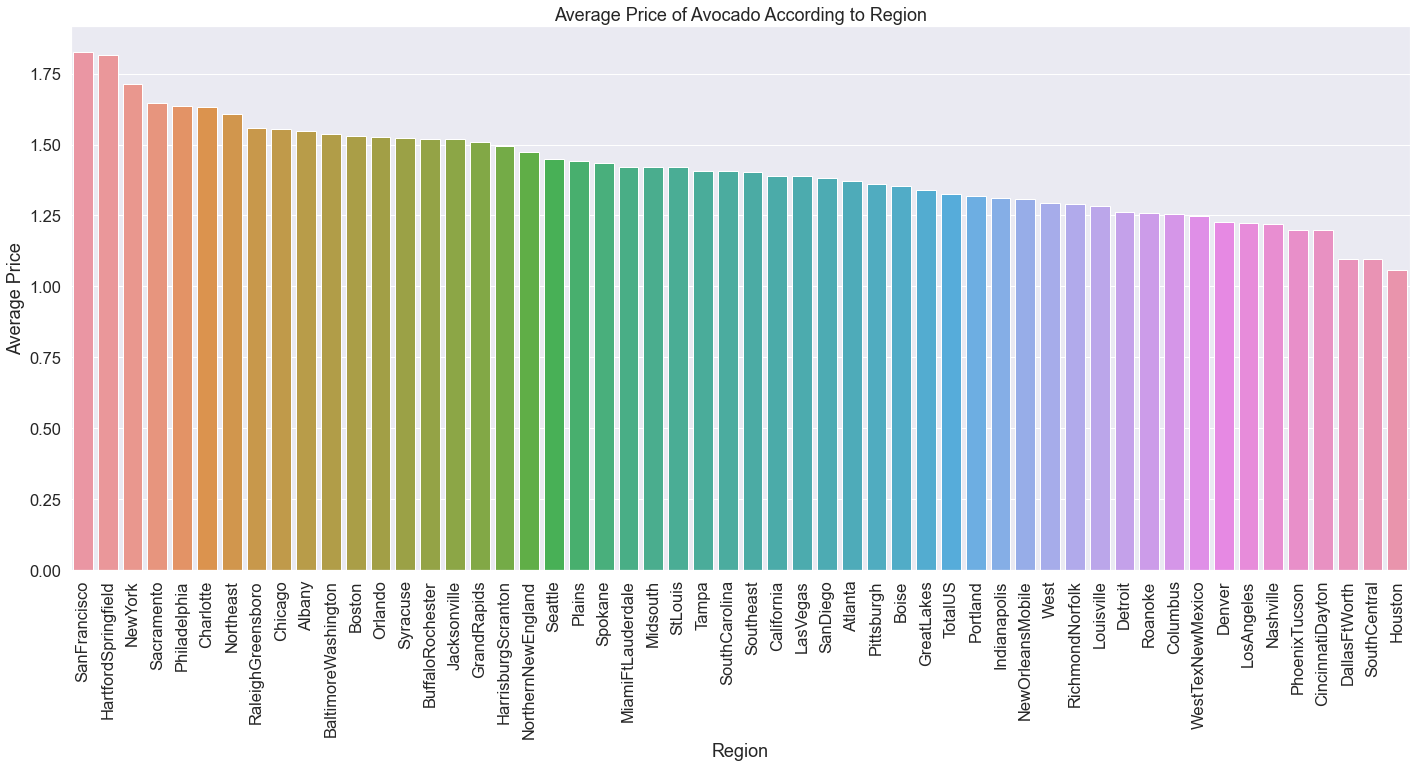

In [49]:

region_list=list(Avocado_Data.region.unique())
average_price=[]

for i in region_list:
    x=Avocado_Data[Avocado_Data.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

Avocado_Data1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=Avocado_Data1.average_price.sort_values(ascending=False).index.values
sorted_data=Avocado_Data1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Looks like these region are where price is very high
- SanFrancisco 
- HartfordSpringfield
- NewYork
- Sacramento
- Philadelphia

Checking TOP 5 Regions where average consumption is very high

Text(0.5, 1.0, 'Average of Total Volume According to Region')

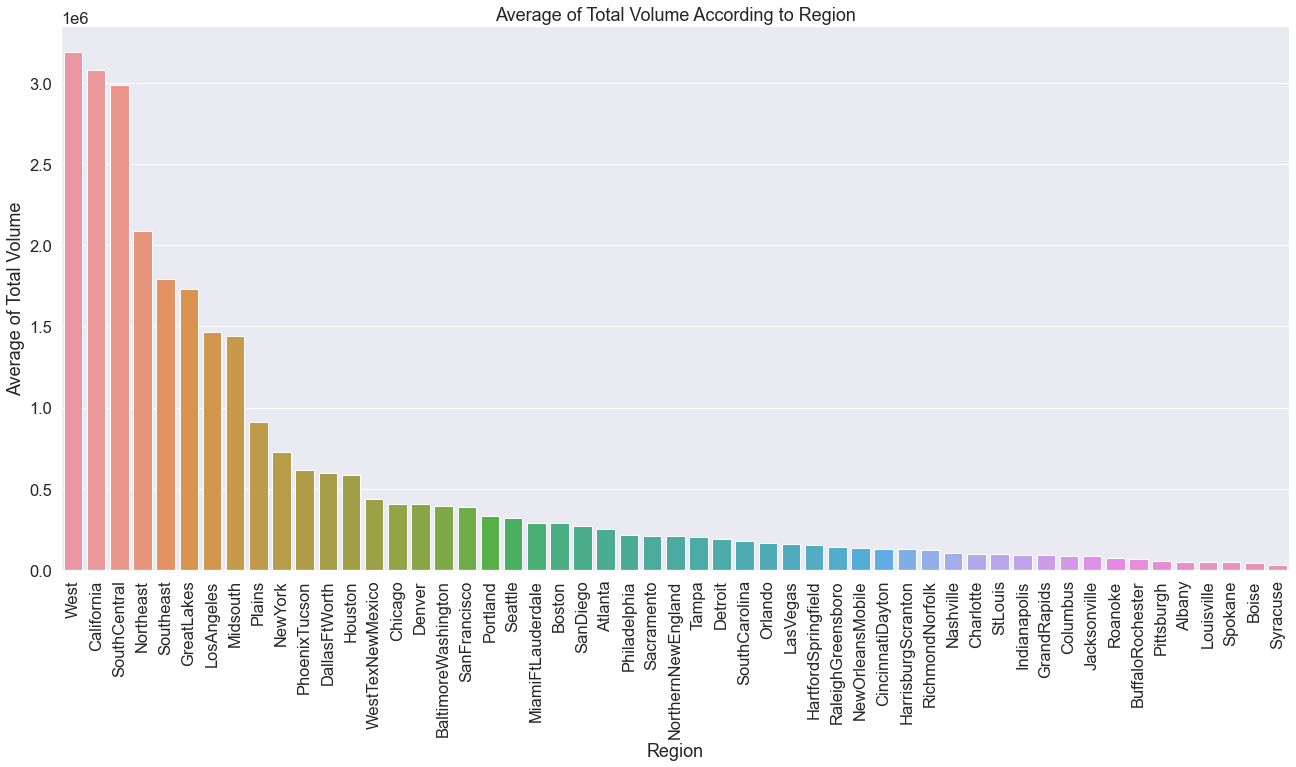

In [50]:
filter1=Avocado_Data.region!='TotalUS'
Avocado_Data1=Avocado_Data[filter1]

region_list=list(Avocado_Data1.region.unique())
average_total_volume=[]

for i in region_list:
    x=Avocado_Data1[Avocado_Data1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
Avocado_Data3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=Avocado_Data3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=Avocado_Data3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

Looks like these region are where Consumption is very high
- West
- California
- SouthCentral
- Northeast
- Southeast

Checking correlation using HeatMap

<AxesSubplot:>

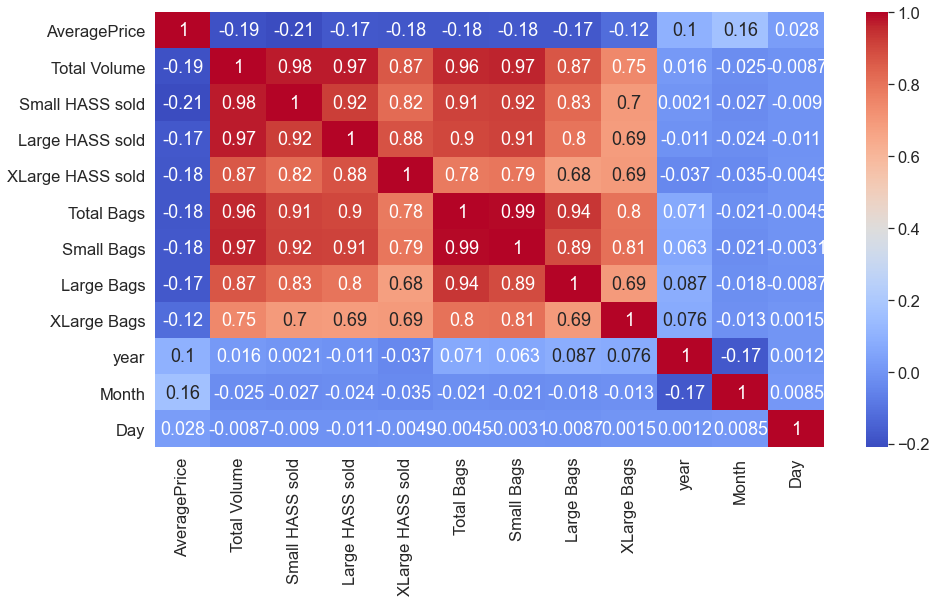

In [52]:
plt.figure(figsize=(15,8))
sns.heatmap(Avocado_Data.corr(),cmap='coolwarm',annot=True)

This heatmap is not useful as previous graph were more ralted to region and type.

Lets convert the Region and Type column to integer using One Hot Encoding

In [53]:
Avocado_Data['region'].nunique()

54

In [54]:
Avocado_Data['type'].nunique()

2

As we can see we have **54 regions** and **2 unique types**, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [55]:
Avocado_final=pd.get_dummies(Avocado_Data.drop(['region','Date'],axis=1),drop_first=True)

In [56]:
Avocado_final.head()

AveragePrice  Total Volume  Small HASS sold  Large HASS sold  \
0       1.86000    2584.08000         61.21000        143.82000   
1       1.14000  100811.00000       3181.00000      43510.00000   
2       0.95000  430096.94000     242212.80000      81697.52000   
3       1.71000    5433.16000        437.48000       2422.71000   
4       1.66000    5614.09000       2123.47000       2121.26000   

   XLarge HASS sold   Total Bags  Small Bags  Large Bags  XLarge Bags  year  \
0           0.00000   2379.05000  2379.05000     0.00000      0.00000  2017   
1          86.00000  54034.00000 11788.00000 42246.00000      0.00000  2017   
2         264.25000 105922.37000 48557.37000 57365.00000      0.00000  2017   
3         544.63000   2028.34000  2021.67000     6.67000      0.00000  2016   
4           0.00000   1369.36000   392.02000   977.34000      0.00000  2016   

   Month  Day  type_organic  
0      8   20             1  
1     11   12             0  
2      2   12             0  
3      5   22             1  
4      1   10             1

## Model Section

We'll going with **Linear Regression** as Target variable Average price is continuous variable

In [57]:
X=Avocado_final.iloc[:,1:14]
y=Avocado_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [59]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.22882372842886994
MSE: 0.08932032338436965
RMSE: 0.29886505882148495


The **RMSE** is low so we can say that we do have a good model, but lets check to be more sure.

Lets plot the y_test vs the predictions

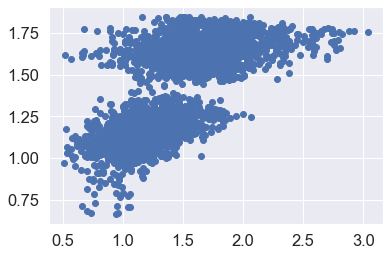

In [60]:
plt.scatter(x=y_test,y=pred)

As we can see that **we don't have a straight line** so I am not sure that this is the best model we can apply on our data

Lets try working with the **Decision Tree Regression** model

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

Text(0, 0.5, 'Predicted Y')

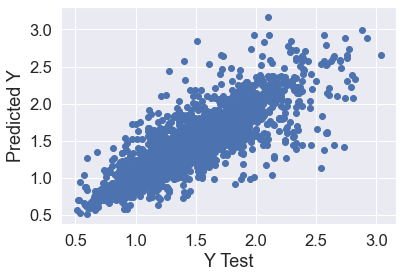

In [62]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [63]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.14198972602739726
MSE: 0.048904417808219185
RMSE: 0.22114343265903055


We can almost have a stright line here and **RMSE** also less than previous model.

Lets check with RandomForestRegressor whether it performs better.

In [64]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10671749999999998
MSE: 0.02349284359246575
RMSE: 0.15327375376255958


Great! **RMSE** went even lower than previous two models. 

Lets have check with DistPlot and Scatter plot

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

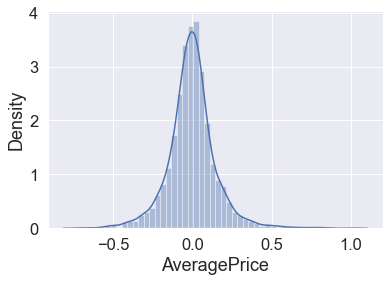

In [66]:
sns.distplot((y_test-pred),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

Y Test    Pred
169   0.54000 0.56450
8466  1.12000 1.53050
3013  1.59000 1.63120
1475  1.74000 1.55230
13797 1.17000 1.15600

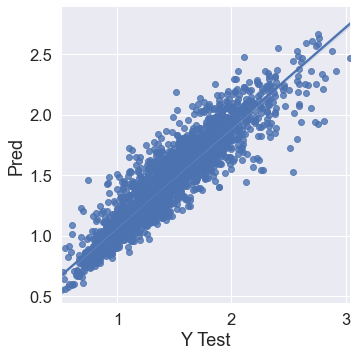

In [67]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

**RandomForestRegressor** forms a line states that this is the best model to use.

## Test with Test Data

### importing and pre-processing just Train Data

In [102]:
Avocado_Test = pd.read_csv("Avocado-Price-Prediction/avocado_test.csv")
Avocado_Test.head()

Id        Date  Total Volume         4046          4225         4770  \
0  11137  2015-05-03   12425.42000    426.78000    6174.20000    548.21000   
1  16503  2017-10-08   11837.20000   2749.91000     124.43000      0.00000   
2   6438  2017-07-02 4250394.01000 740503.01000 1423924.97000 356791.68000   
3   8247  2017-05-14   74951.66000   1032.62000   43170.45000     42.00000   
4  10481  2015-12-13    4594.71000    592.64000    2602.48000      0.00000   

     Total Bags    Small Bags   Large Bags  XLarge Bags          type  year  \
0    5276.23000    2313.33000   2962.90000      0.00000       organic  2015   
1    8962.86000    8921.88000     40.98000      0.00000       organic  2017   
2 1729174.35000 1157601.31000 485376.01000  86197.03000  conventional  2017   
3   30706.59000   28525.65000   2180.94000      0.00000  conventional  2017   
4    1399.59000     696.67000    702.92000      0.00000       organic  2015   

            region  
0  RichmondNorfolk  
1    PhoenixTucson  
2       GreatLakes  
3         Syracuse  
4        Nashville

In [103]:
Avocado_Test.info(verbose = True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            3650 non-null   int64  
 1   Date          3650 non-null   object 
 2   Total Volume  3650 non-null   float64
 3   4046          3650 non-null   float64
 4   4225          3650 non-null   float64
 5   4770          3650 non-null   float64
 6   Total Bags    3650 non-null   float64
 7   Small Bags    3650 non-null   float64
 8   Large Bags    3650 non-null   float64
 9   XLarge Bags   3650 non-null   float64
 10  type          3650 non-null   object 
 11  year          3650 non-null   int64  
 12  region        3650 non-null   object 
dtypes: float64(8), int64(2), object(3)
memory usage: 1001.0 KB


In [104]:
Avocado_Test.rename(columns={'4046':'Small HASS sold',
                          '4225':'Large HASS sold',
                          '4770':'XLarge HASS sold'}, 
                 inplace=True)

In [105]:
Avocado_Test.type.value_counts()

conventional    1825
organic         1825
Name: type, dtype: int64

In [106]:
#Keeping Id for appending in sample submission file
Id = Avocado_Test.Id

Avocado_Test.drop("Id", axis=1,inplace=True) #dropping the column as it pnly contains index

Avocado_Test['Date']=pd.to_datetime(Avocado_Test['Date'])
Avocado_Test['Month']=Avocado_Test['Date'].apply(lambda x:x.month)
Avocado_Test['Day']=Avocado_Test['Date'].apply(lambda x:x.day)

Avocado_Test_final=pd.get_dummies(Avocado_Test.drop(['region','Date'],axis=1),drop_first=True)

In [107]:
Avocado_Test_final.head()

Total Volume  Small HASS sold  Large HASS sold  XLarge HASS sold  \
0   12425.42000        426.78000       6174.20000         548.21000   
1   11837.20000       2749.91000        124.43000           0.00000   
2 4250394.01000     740503.01000    1423924.97000      356791.68000   
3   74951.66000       1032.62000      43170.45000          42.00000   
4    4594.71000        592.64000       2602.48000           0.00000   

     Total Bags    Small Bags   Large Bags  XLarge Bags  year  Month  Day  \
0    5276.23000    2313.33000   2962.90000      0.00000  2015      5    3   
1    8962.86000    8921.88000     40.98000      0.00000  2017     10    8   
2 1729174.35000 1157601.31000 485376.01000  86197.03000  2017      7    2   
3   30706.59000   28525.65000   2180.94000      0.00000  2017      5   14   
4    1399.59000     696.67000    702.92000      0.00000  2015     12   13   

   type_organic  
0             1  
1             1  
2             0  
3             0  
4             1

Lets predict Average Price usign RandomForestRegressor on test data

In [108]:
X_test = Avocado_Test_final
y_pred_test = rdr.predict(X_test)

In [125]:
testdf= pd.DataFrame(data=y_pred_test)

In [126]:
testdf.head()

0
0 1.31650
1 1.56900
2 1.22630
3 1.52240
4 1.56490

In [127]:
testdf = testdf.rename(columns={0:"Predicted Average price"})

In [128]:
testdf = np.round(testdf, decimals=2)

In [129]:
testdf.head()

Predicted Average price
0                  1.32000
1                  1.57000
2                  1.23000
3                  1.52000
4                  1.56000

In [130]:
testdf.insert(0,'ID',Id)

In [131]:
testdf.head()

ID  Predicted Average price
0  11137                  1.32000
1  16503                  1.57000
2   6438                  1.23000
3   8247                  1.52000
4  10481                  1.56000

Creating a submission.csv for submission

In [132]:
testdf.to_csv('submission.csv', index =False, header = False)

### Insights

- After trying with Linear Regression, Decision Tree Regression and Random Forest Regressor; Random Forest Regressor gave the lowest RMSE Score **0.15**
- Random Forest Regessor is selected as best model and used to predict the Average Price of Test data